In [292]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, f1_score

from sklearn.model_selection import KFold, cross_val_score 
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
 

In [293]:
df = pd.read_csv("C:/Users/Dareen/Downloads/archive (21)/german_credit_data_updated.csv")

In [294]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


In [295]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration,Credit Risk
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,476.500000,35.501048,1.909853,3279.112159,20.780922,1.302935
std,275.540378,11.379668,0.649681,2853.315158,12.046483,0.459768
min,0.000000,19.000000,0.000000,250.000000,4.000000,1.000000
25%,238.250000,27.000000,2.000000,1360.250000,12.000000,1.000000
50%,476.500000,33.000000,2.000000,2302.500000,18.000000,1.000000
75%,714.750000,42.000000,2.000000,3975.250000,24.000000,2.000000
max,953.000000,75.000000,3.000000,18424.000000,72.000000,2.000000


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB


In [297]:
df= df.drop(["Unnamed: 0"],axis=1)

In [298]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


In [299]:
for i in list(df.columns):
    if len(df[i].unique()) < 10:
     print(df[i].name +' {}'.format(len(df[i].unique())))

Sex 2
Job 4
Housing 3
Saving accounts 5
Checking account 4
Purpose 8
Credit Risk 2


In [300]:
from sklearn.preprocessing import LabelBinarizer

In [301]:
lb = LabelBinarizer()
df["Sex"] = lb.fit_transform(df["Sex"])

In [302]:
from sklearn.preprocessing import LabelEncoder

In [303]:
le=LabelEncoder()
df['Housing'] = le.fit_transform(df['Housing'])

In [304]:
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])

In [305]:
df['Checking account'] = le.fit_transform(df['Checking account'])

In [306]:
df['Purpose'] = le.fit_transform(df['Purpose'])

In [307]:
df['Credit Risk']=df['Credit Risk'].map({1:0,2:1})

In [308]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,1,2,1,4,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,3,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,1


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               954 non-null    int64
 1   Sex               954 non-null    int32
 2   Job               954 non-null    int64
 3   Housing           954 non-null    int32
 4   Saving accounts   954 non-null    int32
 5   Checking account  954 non-null    int32
 6   Credit amount     954 non-null    int64
 7   Duration          954 non-null    int64
 8   Purpose           954 non-null    int32
 9   Credit Risk       954 non-null    int64
dtypes: int32(5), int64(5)
memory usage: 56.0 KB


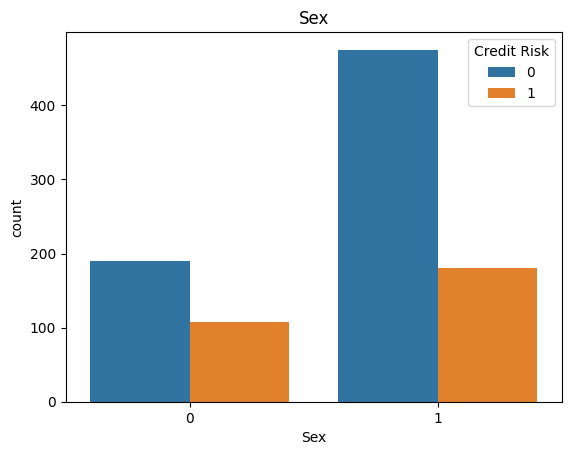

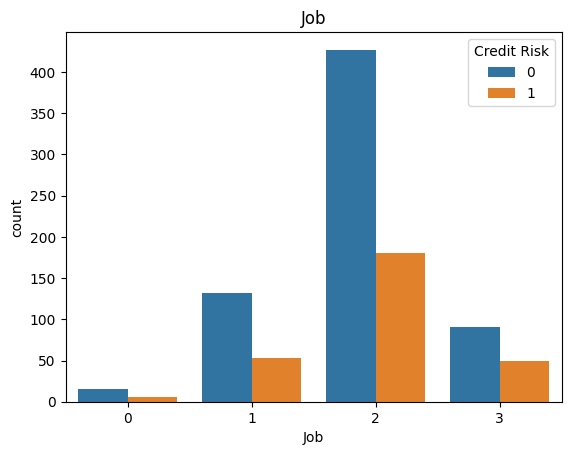

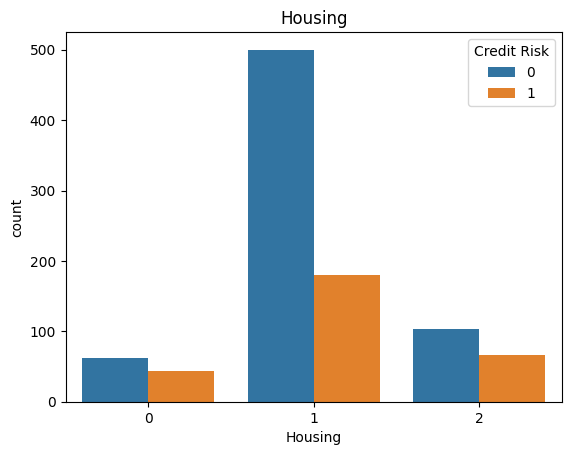

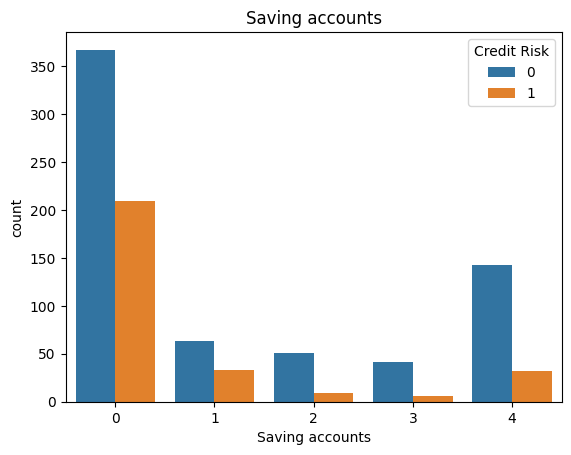

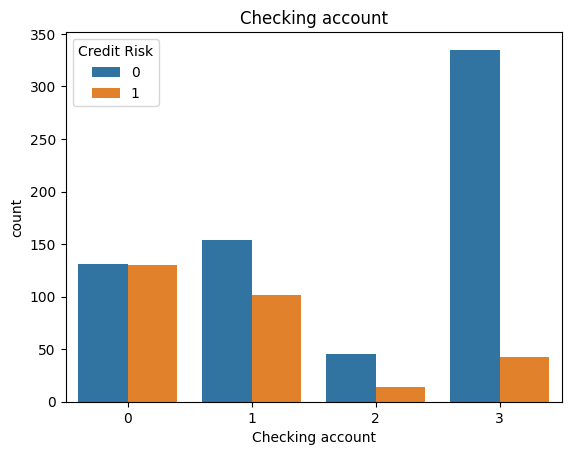

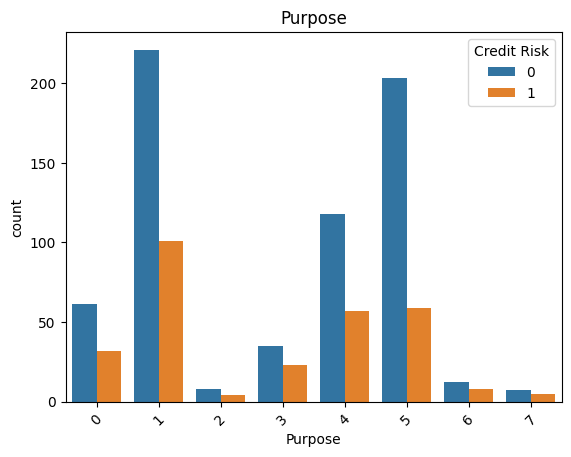

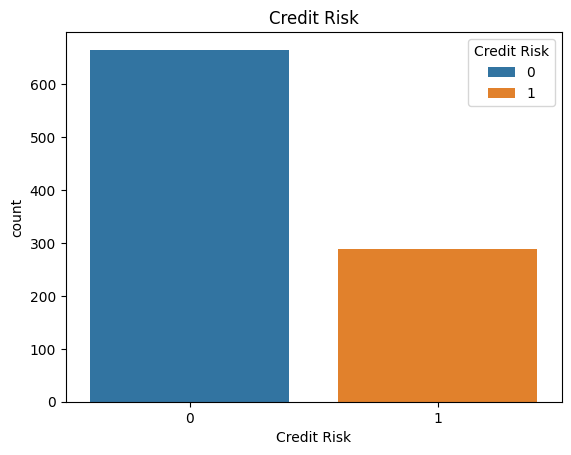

In [310]:
import seaborn as sns
categoric_vars_list = ["Sex", "Job","Housing","Saving accounts", "Checking account", "Purpose", "Credit Risk"]

data_categoric = df.loc[:, categoric_vars_list]
for i in categoric_vars_list:
    plt.figure()
    sns.countplot(x = i, data = data_categoric, hue="Credit Risk")
    plt.title(i)
    if i == "Purpose":
        plt.xticks(rotation=45)

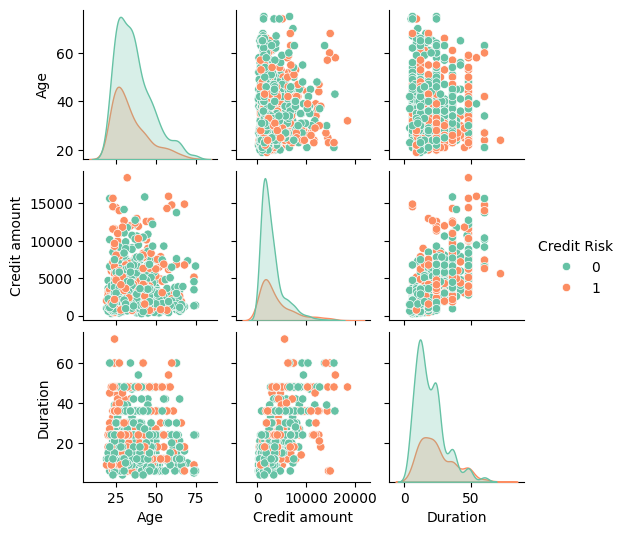

In [311]:
numeric_vars_list = ["Age", "Credit amount", "Duration", "Credit Risk"]

df_numeric = df.loc[:, numeric_vars_list]
sns.pairplot(df_numeric, hue="Credit Risk", diag_kind = "kde", palette="Set2", height=1.8)
plt.show()

In [312]:
scaler = StandardScaler()
df[numeric_vars_list[:-1]] = scaler.fit_transform(df[numeric_vars_list[:-1]])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,2.769455,1,2,1,4,0,-0.739918,-1.227634,5,0
1,-1.187041,0,2,1,0,1,0.936906,2.260689,5,1
2,1.186856,1,1,1,0,3,-0.414862,-0.729302,3,0
3,0.835168,1,2,0,0,0,1.614018,1.762357,4,0
4,1.538545,1,2,0,0,0,0.557850,0.267362,1,1


In [313]:
x= df.drop('Credit Risk',axis=1)
y=df['Credit Risk']

In [314]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [315]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)


In [316]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced')

In [317]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 1,5, 2, 3, 4, 5, 10, 100], 
    'penalty': ['l1', 'l2']   
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)

print("Best hyperparams:", grid_search.best_params_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
Best hyperparams: {'C': 3, 'penalty': 'l2'}


c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Dareen\AppData\Local\Programs\Py

In [318]:
from sklearn.metrics import confusion_matrix
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

Logistic Regression: 0.72
[[99 34]
 [19 39]]
F1 Score: 0.595


In [319]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')

rf_model.fit(X_resampled, y_resampled)
y_pred=rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"random forest: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")


random forest: 0.71
[[95 38]
 [17 41]]
F1 Score: 0.599


In [320]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid_search_dt.fit(X_resampled, y_resampled)
print("Best hyperparams:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparams: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [321]:
y_pred_dt = best_dt.predict(x_test)
y_pred_prob_dt = best_dt.predict_proba(x_test)[:, 1]


print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

print(f"F1 Score: {f1_score(y_test, y_pred_dt)}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       133
           1       0.52      0.74      0.61        58

    accuracy                           0.71       191
   macro avg       0.69      0.72      0.69       191
weighted avg       0.76      0.71      0.72       191

[[93 40]
 [15 43]]
F1 Score: 0.6099290780141845


In [322]:
def prediction_vectorized(data):
    condition = (
        (data['Sex'] == 1) | 
        (data['Job'] == 2) | 
        (data['Housing'] == 1) |
        (data["Checking account"]==3)| 
        (data['Age'] > 40) | 
        (data['Saving accounts'].isin([0,4]))| 
        (data['Credit amount'] > 5000) | 
        (data['Purpose'].isin([1, 5, 4]))|
        (data['Duration']>20)
    )
    return np.where(condition, 0, 1)  
predictions = prediction_vectorized(df)


In [323]:
print(accuracy_score(y, predictions))

0.6981132075471698


In [324]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
adaboost_model.fit(X_resampled, y_resampled)
pred=adaboost_model.predict(x_test)

print("AdaBoostClassifier")
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(f"F1 Score: {f1_score(y_test,pred)}")



AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       133
           1       0.57      0.64      0.60        58

    accuracy                           0.74       191
   macro avg       0.70      0.71      0.71       191
weighted avg       0.75      0.74      0.75       191

[[105  28]
 [ 21  37]]
F1 Score: 0.6016260162601627


c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [325]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb.fit(X_resampled, y_resampled)

y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.77      0.80       133
           1       0.55      0.66      0.60        58

    accuracy                           0.73       191
   macro avg       0.69      0.71      0.70       191
weighted avg       0.75      0.73      0.74       191



In [326]:
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier(class_weight='balanced', random_state=42)
model2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model3 = AdaBoostClassifier(random_state=42)

voting_clf = VotingClassifier(estimators=[('rf', model1), ('dt', model2), ('adb', model3)], voting='soft')
voting_clf.fit(X_resampled, y_resampled)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('adb', AdaBoostClassifier(random_state=42))],
                 voting='soft')